In [2]:
import pandas as pd
import cenpy
import warnings
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import os
from io import BytesIO
from zipfile import ZipFile
import requests

c:\users\tanha\appdata\local\programs\python\python38-32\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
conn = cenpy.products.APIConnection("ACSDT5Y2018")

In [93]:
#computers in household + internet subscrip.
names = ['B28010_001E','B28011_001E']
data = conn.query(names,
                  geo_unit='block group',
                  geo_filter={
                      "state": "36",
                      "county": "061"
                  })
for name in names:
    data[name] = data[name].astype(float)
data['geoid'] = data['state'] + data['county'] + data['tract'] + data[
    'block group']
data = data.replace(-666666666.0, np.nan)

In [94]:
data

,B28010_001E,B28011_001E,state,county,tract,block group,geoid
0,742.0,742.0,36,061,008000,5,360610080005
1,710.0,710.0,36,061,007800,6,360610078006
2,838.0,838.0,36,061,007800,7,360610078007
3,620.0,620.0,36,061,007900,4,360610079004
4,384.0,384.0,36,061,008100,6,360610081006
...,...,...,...,...,...,...,...
1165,0.0,0.0,36,061,020500,0,360610205000
1166,516.0,516.0,36,061,020701,2,360610207012
1167,0.0,0.0,36,061,021100,0,360610211000
1168,646.0,646.0,36,061,017900,1,360610179001


In [95]:
state = '36'
yr = '18'
url = 'https://www2.census.gov/geo/tiger/TIGER20%s/BG/tl_20%s_%s_bg.zip' % (yr, yr, state)
resp = requests.get(url).content
zipfiles = ZipFile(BytesIO(resp))
files = zipfiles.namelist()
_ = [zipfiles.extract(x, path='data/') for x in files]
shapefile = [x for x in files if x[-3:] == 'shp'][0]

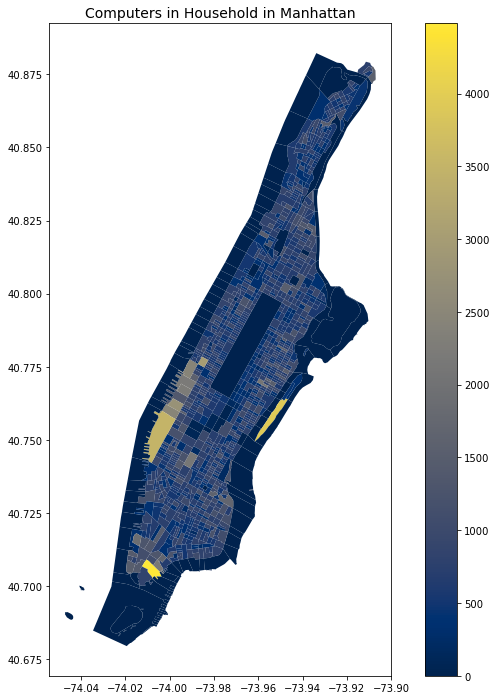

In [54]:
gdf = gpd.read_file('data/' + shapefile)
gdf = gdf.merge(data, left_on='GEOID', right_on='geoid')
gdf.dropna().plot(column=names[0], cmap='cividis', legend=True, figsize=(12,12))
_ = plt.title('Computers in Household in Manhattan', fontsize=14)


In [82]:
#allocation of value + year built
names = ['B25034_001E','B992519_001E']

data = conn.query(names,
                  geo_unit='block group',
                  geo_filter={
                      "state": "36",
                      "county": "061"
                  })
for name in names:
    data[name] = data[name].astype(float)
data['geoid'] = data['state'] + data['county'] + data['tract'] + data[
    'block group']
data = data.replace(-666666666.0, np.nan)

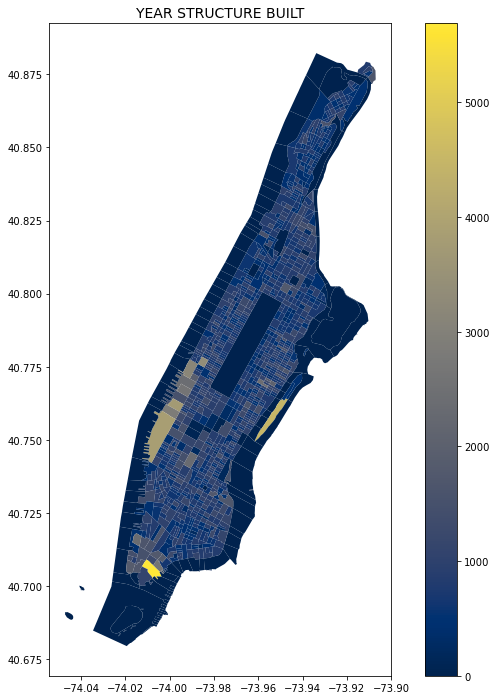

In [67]:
state = '36'
yr = '18'
url = 'https://www2.census.gov/geo/tiger/TIGER20%s/BG/tl_20%s_%s_bg.zip' % (yr, yr, state)
resp = requests.get(url).content
zipfiles = ZipFile(BytesIO(resp))
files = zipfiles.namelist()
_ = [zipfiles.extract(x, path='data/') for x in files]
shapefile = [x for x in files if x[-3:] == 'shp'][0]

gdf = gpd.read_file('data/' + shapefile)
gdf = gdf.merge(data, left_on='GEOID', right_on='geoid')
gdf.dropna().plot(column=names[0], cmap='cividis', legend=True, figsize=(12,12))
_ = plt.title('YEAR STRUCTURE BUILT', fontsize=14)

In [83]:
data

,B25034_001E,B992519_001E,state,county,tract,block group,geoid
0,940.0,427.0,36,061,008000,5,360610080005
1,934.0,139.0,36,061,007800,6,360610078006
2,919.0,90.0,36,061,007800,7,360610078007
3,686.0,346.0,36,061,007900,4,360610079004
4,572.0,84.0,36,061,008100,6,360610081006
...,...,...,...,...,...,...,...
1165,0.0,0.0,36,061,020500,0,360610205000
1166,576.0,37.0,36,061,020701,2,360610207012
1167,0.0,0.0,36,061,021100,0,360610211000
1168,715.0,258.0,36,061,017900,1,360610179001


In [89]:
#median of years ago built
data['B25034_001E'].median()

730.0

In [92]:
#median of allocation of value
data['B992519_001E'].median()

93.5

In [98]:
#income
names = ['B19013_001E' , 'B25034_001E']
data = conn.query(names,
                  geo_unit='block group',
                  geo_filter={
                      "state": "36",
                      "county": "061"
                  })
for name in names:
    data[name] = data[name].astype(float)
data['geoid'] = data['state'] + data['county'] + data['tract'] + data[
    'block group']
data = data.replace(-666666666.0, np.nan)

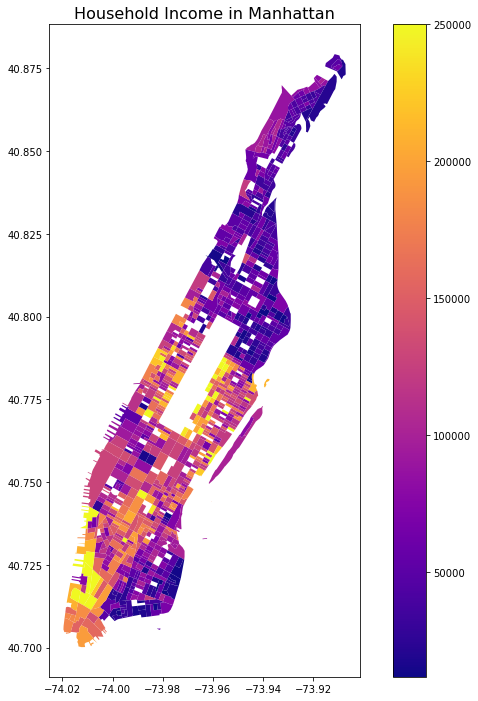

In [99]:
state = '36'
yr = '18'
url = 'https://www2.census.gov/geo/tiger/TIGER20%s/BG/tl_20%s_%s_bg.zip' % (yr, yr, state)
resp = requests.get(url).content
zipfiles = ZipFile(BytesIO(resp))
files = zipfiles.namelist()
_ = [zipfiles.extract(x, path='data/') for x in files]
shapefile = [x for x in files if x[-3:] == 'shp'][0]

gdf = gpd.read_file('data/' + shapefile)
gdf = gdf.merge(data, left_on='GEOID', right_on='geoid')
gdf.dropna().plot(column=names[0], cmap='plasma', legend=True, figsize=(12,12))
_ = plt.title('Household Income in Manhattan', fontsize=16)